In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from SPARQLWrapper import SPARQLWrapper, JSON

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
sparql = SPARQLWrapper('https://sparql.crssnky.xyz/spql/imas')
sparql.setQuery("""
PREFIX schema: <http://schema.org/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX imas: <https://sparql.crssnky.xyz/imasrdf/URIs/imas-schema.ttl#>
PREFIX imasrdf: <https://sparql.crssnky.xyz/imasrdf/RDFs/detail/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX math: <http://www.w3.org/2005/xpath-functions/math#>
PREFIX xsd: <https://www.w3.org/TR/xmlschema11-2/#>
PREFIX rdfs:  <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?name ?title ?gender ?bust ?waist ?hip ?weight ?height ?age ?div ?attr ?type
WHERE {
    ?i rdf:type imas:Idol;
       schema:name ?name.
    ?i schema:weight ?weight;
       schema:height ?height;
       foaf:age ?age;
       imas:Title ?title;
       schema:gender ?gender.
    OPTIONAL {?i imas:Bust ?bust} .
    OPTIONAL {?i imas:Waist ?waist} .
    OPTIONAL {?i imas:Hip ?hip} .
    OPTIONAL {?i imas:Division ?div} .
    OPTIONAL {?i imas:Attribute ?attr} .
    OPTIONAL {?i imas:Type ?type} .
       
}
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

In [3]:
def s2f(s):
    try:
        v = float(s)
    except:
        v = None
    finally:
        return v

def try_v(i, name):
    try:
        a = i[name]['value']
    except:
        a = None
    finally:
        return a

In [4]:
items = []

for idol in results['results']['bindings']:
    name = idol['name']['value']
    title = idol['title']['value']
    gender = idol['gender']['value']
    
    bust = s2f(try_v(idol, 'bust'))
    waist = s2f(try_v(idol, 'waist'))
    hip = s2f(try_v(idol, 'hip'))
    
    div = try_v(idol, 'div')
    att = try_v(idol, 'attr')
    typ = try_v(idol, 'type')

    weight = s2f(idol['weight']['value'])
    height = s2f(idol['height']['value'])
    age = s2f(idol['age']['value'])
    items.append([name, title, gender, bust, waist, hip, weight, height, age, div, att, typ])
    
idols = pd.DataFrame(items, columns=('name', 'title', 'gender', 'bust', 'waist', 'hip', 'weight', 'height', 'age', 'div', 'attr', 'type'))
idols['class'] = None
idols = idols.replace('(Vi)', 'Vi')
idols = idols.replace('(Vo)', 'Vo')
idols = idols.replace('(Da)', 'Da')
idols.loc[(idols['div'] == 'Fairy') | (idols['type'] == 'Co'), 'class'] = 'Co'
idols.loc[(idols['div'] == 'Angel') | (idols['type'] == 'Pa'), 'class'] = 'Pa'
idols.loc[(idols['div'] == 'Princess') | (idols['type'] == 'Cu'), 'class'] = 'Cu'
idols.loc[idols['name'] == '辻野あかり', 'waist'] = 60.0
idols.head()

,name,title,gender,bust,waist,hip,weight,height,age,div,attr,type,class
0,難波笑美,CinderellaGirls,female,82.0,56.0,80.0,45.0,158.0,17.0,None,None,Pa,Pa
1,佐城雪美,CinderellaGirls,female,63.0,47.0,65.0,30.0,137.0,10.0,None,None,Co,Co
2,周防桃子,MillionStars,female,73.0,53.0,74.0,35.0,140.0,11.0,Fairy,Vi,None,Co
3,大石泉,CinderellaGirls,female,83.0,55.0,82.0,41.0,157.0,15.0,None,None,Co,Co
4,篠原礼,CinderellaGirls,female,93.0,58.0,88.0,49.0,171.0,27.0,None,None,Co,Co


In [5]:
idols.title.unique()

array(['CinderellaGirls', 'MillionStars', '283Pro', '315ProIdols',
       '765AS', 'DearlyStars'], dtype=object)

In [6]:
idols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 13 columns):
name      307 non-null object
title     307 non-null object
gender    307 non-null object
bust      259 non-null float64
waist     259 non-null float64
hip       259 non-null float64
weight    305 non-null float64
height    307 non-null float64
age       305 non-null float64
div       51 non-null object
attr      51 non-null object
type      186 non-null object
class     237 non-null object
dtypes: float64(6), object(7)
memory usage: 31.3+ KB


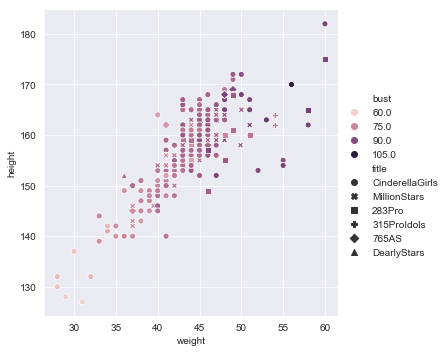

In [7]:
sns.relplot(x='weight', y='height', hue='bust', style='title', sizes=(15,200), data=idols)
plt.show()

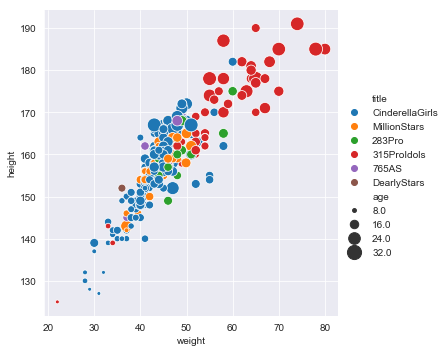

In [8]:
sns.relplot(x='weight', y='height', hue='title', size='age', sizes=(15,200), data=idols)
plt.show()

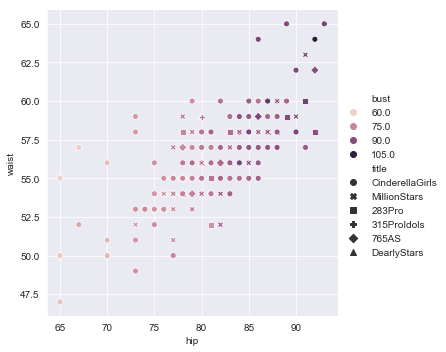

In [9]:
sns.relplot(x='hip', y='waist', hue='bust', style='title', sizes=(15,200), data=idols)
plt.show()

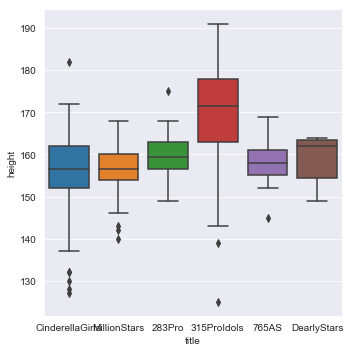

In [10]:
sns.catplot(x='title', y='height', kind='box', data=idols)
plt.show()

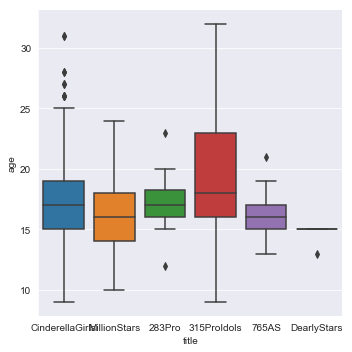

In [11]:
sns.catplot(x='title', y='age', kind='box', data=idols)
plt.show()

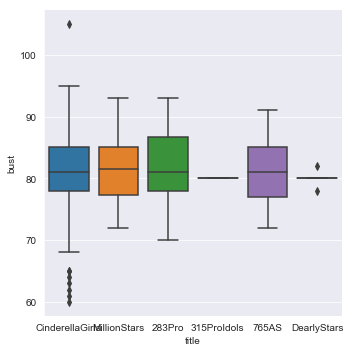

In [12]:
sns.catplot(x='title', y='bust', kind='box', data=idols)
plt.show()

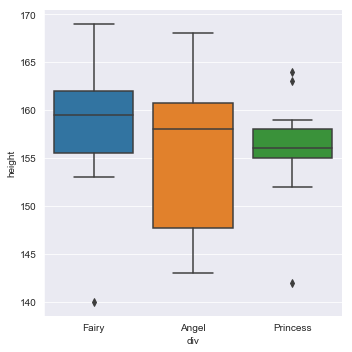

In [13]:
sns.catplot(x='div', y='height', kind='box', data=idols)
plt.show()

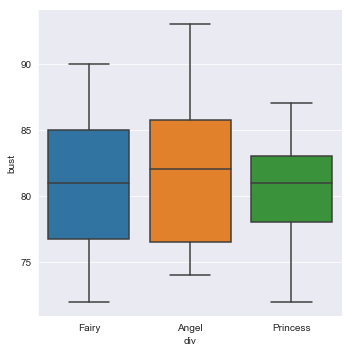

In [14]:
sns.catplot(x='div', y='bust', kind='box', data=idols)
plt.show()

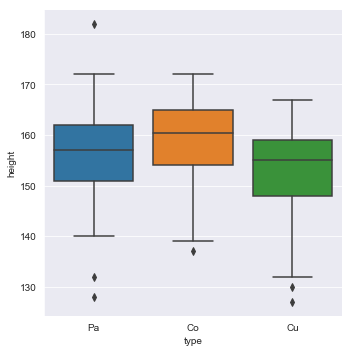

In [15]:
sns.catplot(x='type', y='height', kind='box', data=idols)
plt.show()

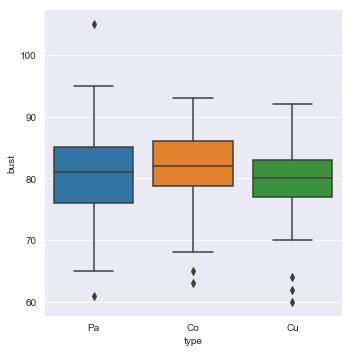

In [16]:
sns.catplot(x='type', y='bust', kind='box', data=idols)
plt.show()

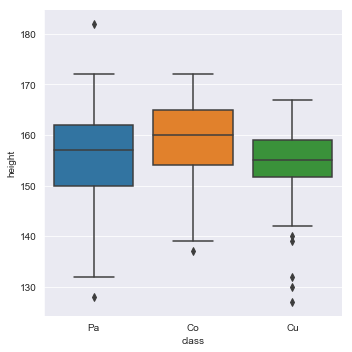

In [17]:
sns.catplot(x='class', y='height', kind='box', data=idols)
plt.show()

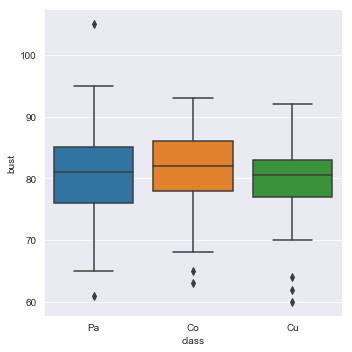

In [18]:
sns.catplot(x='class', y='bust', kind='box', data=idols)
plt.show()

/home/shimo/.pyenv/versions/3.7.2/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shimo/.pyenv/versions/3.7.2/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


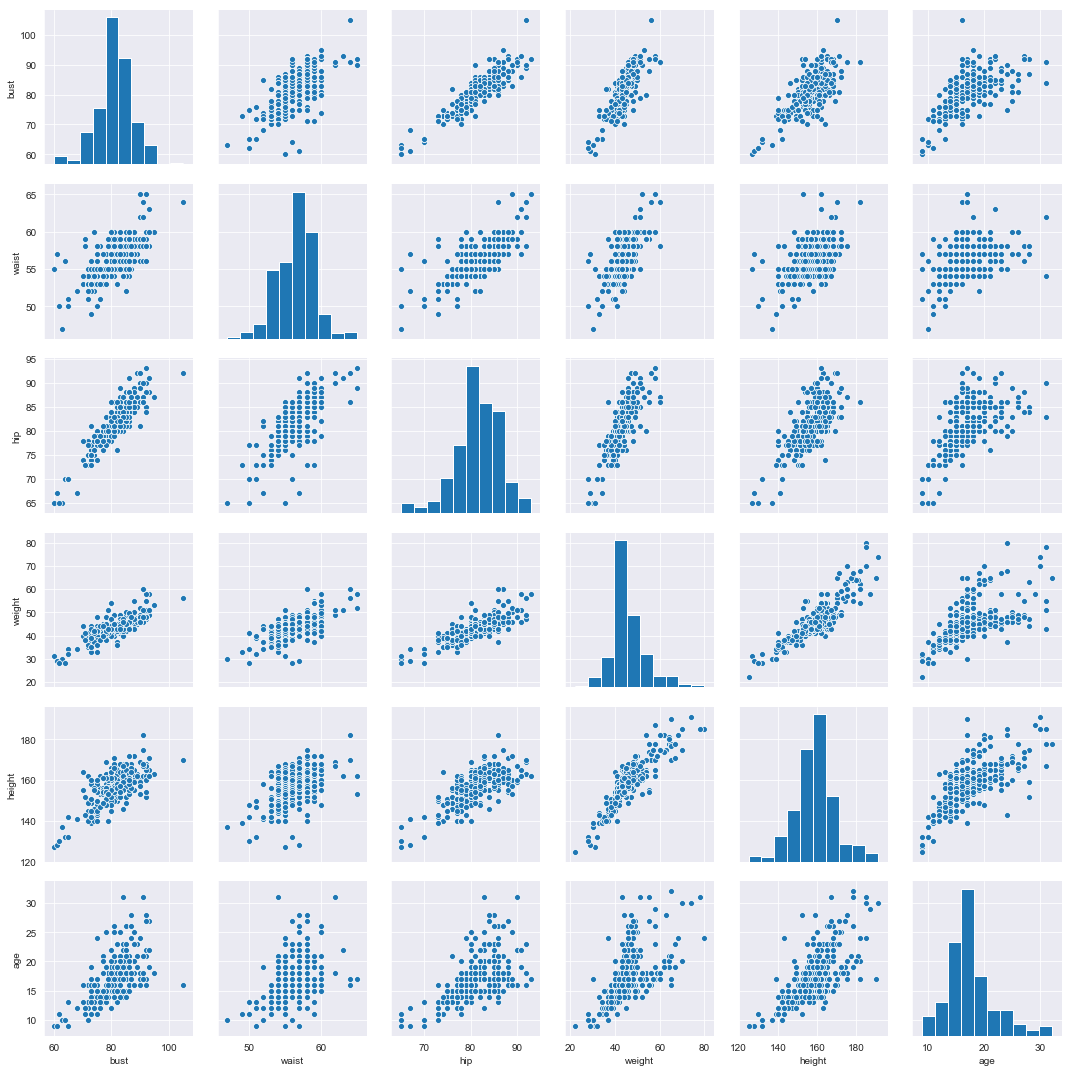

In [19]:
sns.pairplot(idols)